
# Bitcoin Market Sentiment Analysis
## Name : Fayaz Mirji

# Observation points
## **Acount**
Unique identifier of a trader, Group trades by account to analyze trader-level behavior  Who's profitable?
## **Coin**  
The crypto asset traded (e.g., BTC, ETH)   which coins are most frequently traded?  Does sentiment impact coin choice?
##**Execution Price**
The price at which the asset was traded     Track price movement per day  Volatility during fear vs greed               
## **Size Tokens**   
Quantity of tokens traded Average trade size in tokens  Larger trades during Greed?   
## **Size USD**
Trade size converted to USD Trade volume trends  Compare risk appetite by sentiment                    
## **Side**
Trade direction: `Buy` or `Sell` Are there more buys during Greed, more sells during Fear?                         
## **Timestamp IST**
Trade execution time in IST  Extract `Date` to merge with sentiment  Time of day pattern analysis        
## **Start Position**  
Position size **before** this trade was executed Do traders increase positions during Greed?  Volatility in position sizes  
## **Direction**  
Net effect on position: `Increase`, `Decrease`, or `Close` Understand how traders manage risk across sentiment                               
##**Closed PnL**
Profit or Loss **realized** when position is closed  Central to your analysis!  Compare avg PnL in Fear vs Greed                 
## **Transaction Hash**  
Blockchain hash (likely unique ID)       Not useful for analysis unless you're doing blockchain tracing                    
##**Order ID**  
Order-specific identifier  Not meaningful for analysis;ignore                                               
##**Crossed**
Whether this trade was executed across the spread (usually True/False) Indicates aggressive trading (market orders)  More aggression in Greed?     
## **Fee**  
Trading fee incurred  Compare cost of trading per sentiment  Fee as % of trade                    
## **Trade ID**  
Unique identifier for the trade Not needed unless tracking trade sequence           

## **timestamp**
Unix timestamp (in seconds) for that day's reading
## **value**
Numerical score from 0 to 100 representing the market sentiment
## **classification**
Human-readable label: "Extreme Fear", "Fear", "Neutral", etc.
## **date**
The calendar date corresponding to the sentiment reading (YYYY-MM-DD)

In [1]:
# Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


In [2]:
# Mounting the drive where the data is stored
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path were my file is located u can change the path as per ur location.
data_1=pd.read_csv(r"/content/drive/MyDrive/historical_data.csv")
data_1

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [4]:
# Checking the mean,count,25 percentiles and other percentiles and min,max values.
data_1.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [5]:
#Checking the object oriented vlaues and their freq.
data_1.describe(include='O')

,Account,Coin,Side,Timestamp IST,Direction,Transaction Hash
count,211224,211224,211224,211224,211224,211224
unique,32,246,2,27977,12,101184
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,SELL,14-02-2025 00:31,Open Long,0x00000000000000000000000000000000000000000000...
freq,40184,68005,108528,441,49895,9032


In [6]:
# Gives the amount of non null values and the dtypes.
print(data_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
# Path were my file is located u can change the path as per ur location.
data_2=pd.read_csv(r"/content/drive/MyDrive/fear_greed_index.csv")
data_2

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [8]:
# Gives the amount of non null values and the dtypes.
print(data_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None


In [9]:
# Gives the amount of non null values and the dtypes.
data_2.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [10]:
data_1['Order ID'].value_counts()

,count
Order ID,
61636246980,390
78766167752,372
76557824768,366
86618342363,354
78766120810,298
...,...
88363778895,1
88363808596,1
55379734663,1


* These are the Order ID of the trade and if u want u check for the orders we can see that from 61636246980 ID has the highest trade made. and we can also see the top 10 highest trade ID`s.

In [11]:
# Object variables.
data_2.describe(include='O')

,classification,date
count,2644,2644
unique,5,2644
top,Fear,2025-05-02
freq,781,1


# Data Cleaning


In [12]:
# Check if there are null values.
data_1.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [13]:
# If found any null values and it is less than 5% we can delete it using these code.
data_1.dropna(inplace=True)

In [14]:
# Checking null values in data_2.
data_2.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [15]:
data_1.head(1000)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,HYPE,26.3340,575.18,15146.79,SELL,28-12-2024 14:40,-33336.620000,Open Short,0.0,0x0aee04595549b60c9756041a21d7dc02017a0019be8d...,59167726653,False,1.454091,8.130000e+14,1.740000e+12
996,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,HYPE,26.5660,4.46,118.48,SELL,28-12-2024 15:22,-33911.800000,Open Short,0.0,0x00000000000000000000000000000000000000000000...,59182341465,False,0.011374,4.350000e+13,1.740000e+12
997,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,HYPE,26.5660,31.58,838.95,SELL,28-12-2024 15:22,-33916.260000,Open Short,0.0,0x00000000000000000000000000000000000000000000...,59182341465,False,0.080539,9.200000e+14,1.740000e+12
998,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,HYPE,26.5660,0.64,17.00,SELL,28-12-2024 15:22,-33947.840000,Open Short,0.0,0x00000000000000000000000000000000000000000000...,59182341465,False,0.001632,6.000000e+14,1.740000e+12


In [16]:
data_1.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,382.2,420.80,SELL,25-04-2025 15:35,7546.6,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,2124.1,2338.63,SELL,25-04-2025 15:35,7164.4,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,423.4,466.16,SELL,25-04-2025 15:35,5040.3,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,3599.8,3963.38,SELL,25-04-2025 15:35,4616.9,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12
211223,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.101,1017.1,1119.83,SELL,25-04-2025 15:35,1017.1,Close Long,-53.9063,0xac77fab973c455d77a670422374d9602039800f1f78c...,88803313862,False,0.111982,3.270000e+14,1.750000e+12


In [17]:
# Droping the columns.
data_1.drop(['Timestamp','Transaction Hash','Trade ID'],axis=1,inplace=True)

* Droping the columns as these columns are not required and does not add value much.

In [18]:
data_1.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Order ID', 'Crossed', 'Fee'],
      dtype='object')

In [19]:
data_1.Account.value_counts()

,count
Account,
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,40184
0xbaaaf6571ab7d571043ff1e313a9609a10637864,21192
0xa0feb3725a9335f49874d7cd8eaad6be45b27416,15605
0x8477e447846c758f5a675856001ea72298fd9cb5,14998
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,14733
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
0x513b8629fe877bb581bf244e326a047b249c4ff1,12236
0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,9893
0x47add9a56df66b524d5e2c1993a43cde53b6ed85,8519


* From these Account values count we can see that the highest account count used for trading, That means this account individual trades the most.

In [20]:
# Check which coin is used most.
data_1.Coin.value_counts()

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691
...,...
@18,1
@30,1
@25,1


* It can be seen that which coins have used the most in  trading business so its Hype, @107, BTC, ETH, SOL and other unknow coins can be seen in the list, That may be they are doing well in market.

In [21]:
#Closed PnL > 0, it’s a profit.
#If Closed PnL < 0, it’s a loss.
#If Closed PnL == 0, it's breakeven.



In [22]:
data_2.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [23]:
data_2.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [24]:
#Dropping the column as it is not required.
data_2.drop('timestamp',axis=1,inplace=True)

# Feature Engineering

In [25]:
# Converting the Timestamp IST to datetime format.
data_1['Timestamp IST']=pd.to_datetime(data_1['Timestamp IST'], format='mixed', dayfirst=True)

In [26]:
# Data type
data_1['Timestamp IST'].dtype

dtype('<M8[ns]')

In [27]:
# Converting the date to datetime format.
data_2['Date']=pd.to_datetime(data_2['date'])
data_2.Date.dtype

dtype('<M8[ns]')

In [28]:
data_1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,52017706630,True,0.345404
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,52017706630,True,0.005600
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,52017706630,True,0.050431
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,52017706630,True,0.050043
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,52017706630,True,0.003055


In [29]:
# Encoding the data So that plotting will be easier.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data_1['Account']=le.fit_transform(data_1.Account)

In [30]:
data_1.Account.value_counts().head()

,count
Account,
31,40184
29,21192
23,15605
21,14998
27,14733


In [31]:
# Taking just the date from the timestamp ist and creating new column as date and dropping the Timestamp IST.
import datetime as dt
data_1['Date']=data_1['Timestamp IST'].dt.date
data_1.drop('Timestamp IST',axis=1,inplace=True)
data_1.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Date
0,25,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,52017706630,True,0.345404,2024-12-02
1,25,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,52017706630,True,0.005600,2024-12-02


In [32]:
print(data_1.Date.dtype)
data_1['Date']=pd.to_datetime(data_1['Date'])
print(data_1.Date.dtype)

object
datetime64[ns]


In [33]:
# Execution Price is just the unit price, not the total value traded so we are using size USD which is the total value of execution
# and Size Token to calculate the profit%.
data_1['Profit %'] = (data_1['Closed PnL'] / data_1['Size USD']) * 100
data_1.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Date,Profit %
0,25,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,52017706630,True,0.345404,2024-12-02,0.0
1,25,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,52017706630,True,0.005600,2024-12-02,0.0
2,25,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,52017706630,True,0.050431,2024-12-02,0.0
3,25,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,52017706630,True,0.050043,2024-12-02,0.0
4,25,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,52017706630,True,0.003055,2024-12-02,0.0


In [34]:
# Merging the two data frames data_1 and data_2 as df.
df=pd.merge(data_1,data_2,on='Date',how='left')
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Date,Profit %,value,classification,date
0,25,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,52017706630,True,0.345404,2024-12-02,0.0,80.0,Extreme Greed,2024-12-02
1,25,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,52017706630,True,0.005600,2024-12-02,0.0,80.0,Extreme Greed,2024-12-02
2,25,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,52017706630,True,0.050431,2024-12-02,0.0,80.0,Extreme Greed,2024-12-02
3,25,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,52017706630,True,0.050043,2024-12-02,0.0,80.0,Extreme Greed,2024-12-02
4,25,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,52017706630,True,0.003055,2024-12-02,0.0,80.0,Extreme Greed,2024-12-02


In [35]:
df.tail(1000)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Date,Profit %,value,classification,date
210224,15,HYPE,11.950,1.73,20.67,SELL,-13228.08,Open Short,0.0000,84893421127,False,0.002067,2025-04-08,0.000000,24.0,Extreme Fear,2025-04-08
210225,15,HYPE,11.950,42.54,508.35,SELL,-13229.81,Open Short,0.0000,84893421127,False,0.050835,2025-04-08,0.000000,24.0,Extreme Fear,2025-04-08
210226,15,HYPE,11.950,587.40,7019.43,SELL,-13272.35,Open Short,0.0000,84893421127,False,0.701943,2025-04-08,0.000000,24.0,Extreme Fear,2025-04-08
210227,15,HYPE,11.950,366.13,4375.25,SELL,-13859.75,Open Short,0.0000,84893421127,False,0.437525,2025-04-08,0.000000,24.0,Extreme Fear,2025-04-08
210228,15,HYPE,11.950,417.92,4994.14,SELL,-14225.88,Open Short,0.0000,84893421127,False,0.499414,2025-04-08,0.000000,24.0,Extreme Fear,2025-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,15,FARTCOIN,1.101,382.20,420.80,SELL,7546.60,Close Long,-20.2566,88803313862,False,0.042080,2025-04-25,-4.813831,60.0,Greed,2025-04-25
211220,15,FARTCOIN,1.101,2124.10,2338.63,SELL,7164.40,Close Long,-112.5773,88803313862,False,0.233863,2025-04-25,-4.813814,60.0,Greed,2025-04-25
211221,15,FARTCOIN,1.101,423.40,466.16,SELL,5040.30,Close Long,-22.4402,88803313862,False,0.046616,2025-04-25,-4.813841,60.0,Greed,2025-04-25
211222,15,FARTCOIN,1.101,3599.80,3963.38,SELL,4616.90,Close Long,-190.7894,88803313862,False,0.396337,2025-04-25,-4.813805,60.0,Greed,2025-04-25


In [36]:
# Checking the null values after merging and creating of new column.
df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Start Position,0
Direction,0
Closed PnL,0
Order ID,0


In [37]:
# To avoid the confusion deleting one date column
df.drop('date',axis=1,inplace=True)

#droping the null values as NaN values is below 5% after merging the two datasets
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Start Position,0
Direction,0
Closed PnL,0
Order ID,0


# Exploratory Data Analysis

In [39]:
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Order ID,Crossed,Fee,Date,Profit %,value,classification
0,25,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,52017706630,True,0.345404,2024-12-02,0.0,80.0,Extreme Greed
1,25,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,52017706630,True,0.005600,2024-12-02,0.0,80.0,Extreme Greed
2,25,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,52017706630,True,0.050431,2024-12-02,0.0,80.0,Extreme Greed
3,25,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,52017706630,True,0.050043,2024-12-02,0.0,80.0,Extreme Greed
4,25,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,52017706630,True,0.003055,2024-12-02,0.0,80.0,Extreme Greed


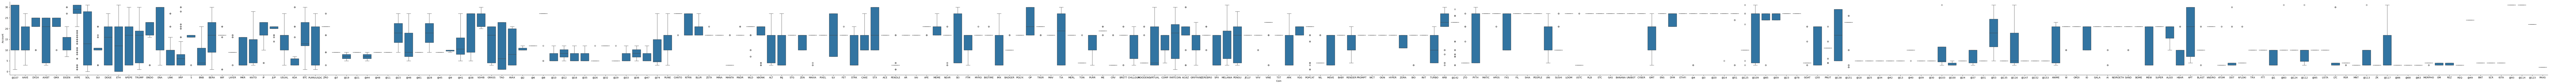

In [40]:
# Plotting Coin vs Account
sns.catplot(x='Coin',y='Account',data=df,aspect=30,kind='box')
plt.show()

* As it can be seen from the plot that the traders have used all types of coin Not one specific coin.
* But from the chart it can be also seen that the most coins used are named one as compare to Coded coins like for example @63.

In [41]:
df.Account.value_counts().head()

,count
Account,
31,40174
29,21192
23,15605
21,14997
27,14732


In [42]:
# To check the coin used by the highest trading person.
account_31=df[df.Account==31]
coin_value=account_31.Coin.value_counts().head(10)
coin_value

,count
Coin,
HYPE,23454
@107,16379
ETH,220
MELANIA,82
SOL,28
@125,1
@109,1
@53,1
@112,1


* The highest trading person with account as 31 encoded uses @Hype, @107, ETH, Melanina, sol, and other coded coins shown in the list for most of his trading.

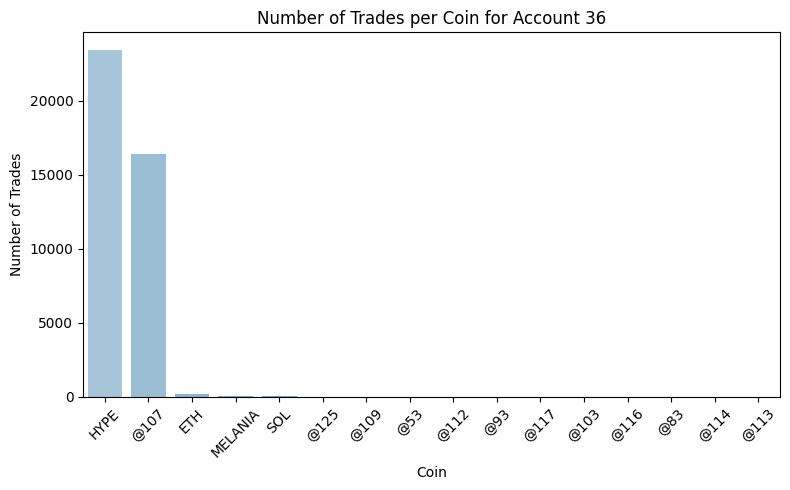

In [43]:
# Plotting the account 31 highest trader vs coin used.

# Filter for account 36
account_31_df = df[df['Account'] == 31]  # or '31' if it's a string

# Count trades per coin
coin_counts = account_31_df['Coin'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=coin_counts.index, y=coin_counts.values, palette='Blues_d')
plt.title('Number of Trades per Coin for Account 36')
plt.xlabel('Coin')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [44]:
df.Coin.value_counts().head()

,count
Coin,
HYPE,68005
@107,29992
BTC,26064
ETH,11158
SOL,10691


In [45]:
# creating group by data of coin to calculate their profit mean with highest profits.
coin_profit=df.groupby('Coin')['Profit %'].mean().sort_values(ascending=False)
coin_profit=coin_profit.head(10)

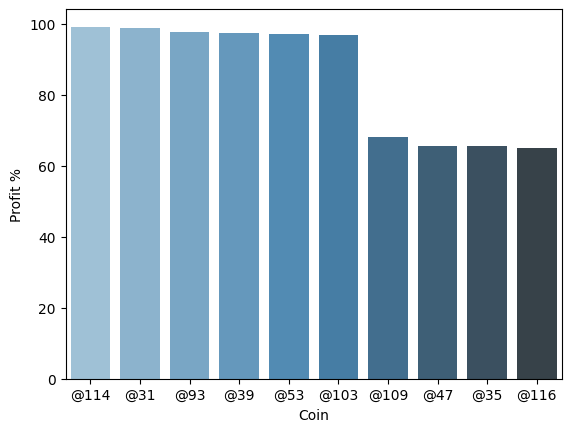

In [46]:
# Plotting the coins vs the profit made by them.
sns.barplot(x=coin_profit.index,y=coin_profit.values,palette='Blues_d')
plt.xlabel('Coin')
plt.ylabel('Profit %')
plt.show()

* It can be seen form the plot that coins @114,@31, @93, @39, @53, @103,@109, @47, @35, @116 are making most profits in the market.
* They might be not returning the highest but their mean values is highest that means these coins overall performance is highest as per the no. of times they are used.

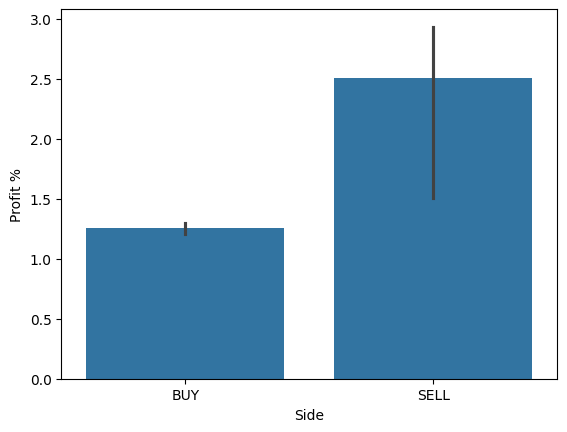

In [47]:
# side is action in trade
# Direction Strategic Invent

# plotting Side vs Direction
sns.barplot(x='Side',y='Profit %',data=df)
plt.show()

* As per the data, Seller has made more profits than buyers which is obvious in market.
* Buying has also made profit but not that amount of profit as seller made.
* selling them at right time higher selling tends to make more profit.

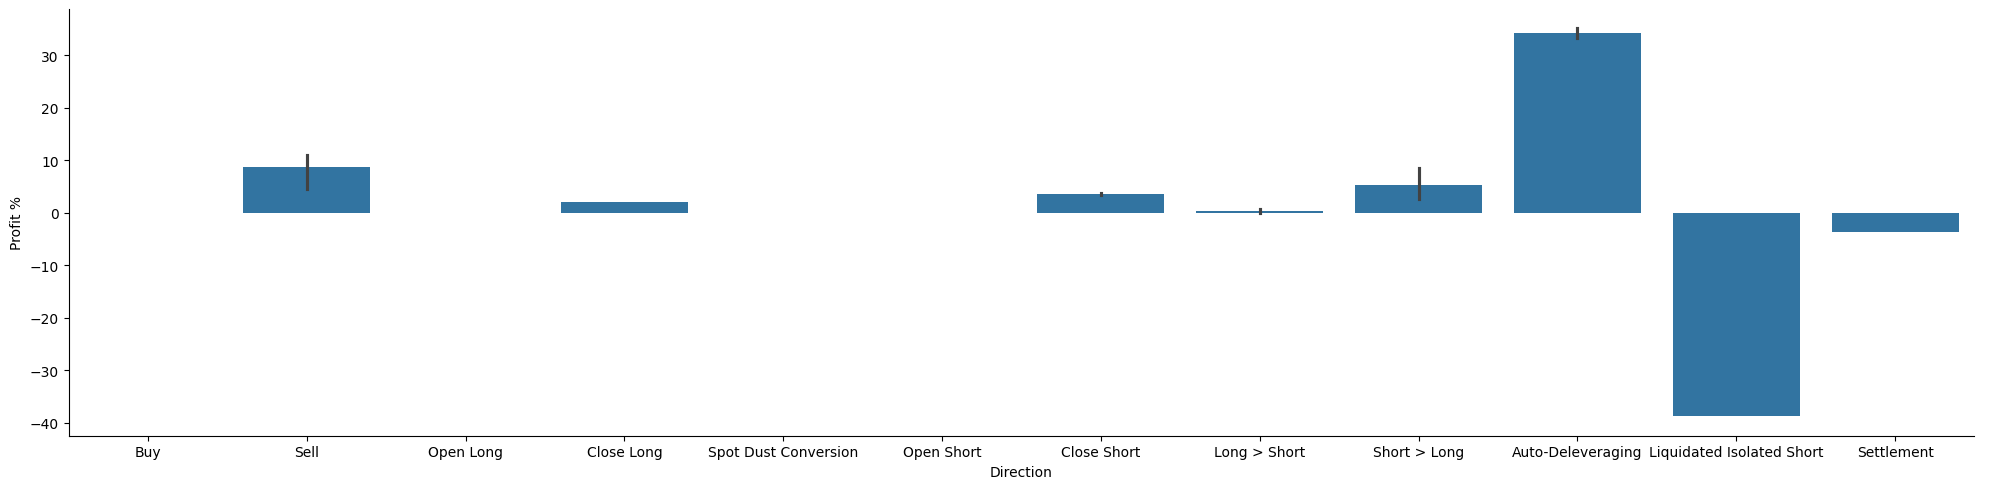

In [48]:
# Plotting Direction intent vs Profit %.
sns.catplot(x='Direction',y='Profit %',data=df,aspect=4,kind='bar')
plt.show()

* Auto-Deleveraging mechanism is showing the most profit as compare
to other startegic directions.
* The second most is selling intent.
* From the data it can be seen that Liquidated Isolated Short intent is performing worst and is increasing loses.

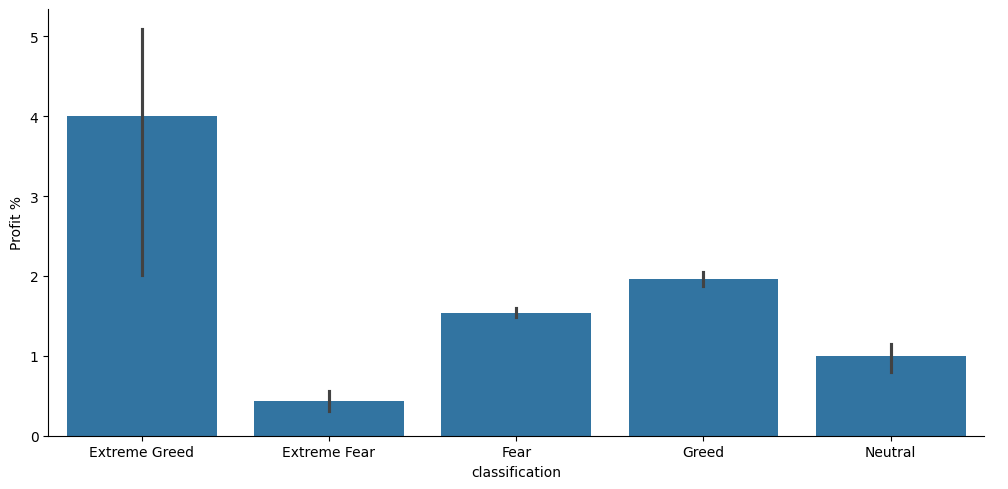

In [49]:
# Plotting Classification vs Profit %.
sns.catplot(x='classification',y='Profit %',data=df,aspect=2,kind='bar')
plt.show()

* From these plot we can say that the trader with extreem greed means taking risk for trading tends to have higher profits as compare to neutrals and fears.

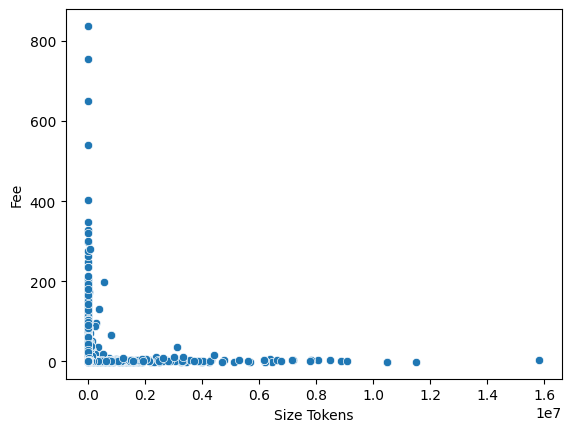

In [50]:
# Plotting size Tokens vs Fee
sns.scatterplot(x='Size Tokens',y='Fee',data=df)
plt.show()

* As u can see their is no correlation between sizen takens and Fees.

In [51]:
# Creating groupby of coin and calculate the fee mean high values
fee_max=df.groupby('Coin')['Fee'].mean().sort_values(ascending=False)
fee_max=fee_max.head(10)

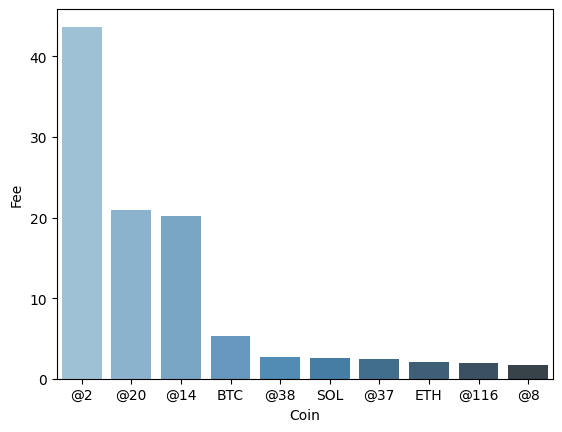

In [52]:
# Plotting Coin vs Fee to check which coin trading has higher fee.
sns.barplot(x=fee_max.index,y=fee_max.values,palette='Blues_d')
plt.xlabel('Coin')
plt.ylabel('Fee')
plt.show()

* So coded Coins are showing higher fees but that may not the reasons for high fees.

In [53]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Order ID', 'Crossed',
       'Fee', 'Date', 'Profit %', 'value', 'classification'],
      dtype='object')

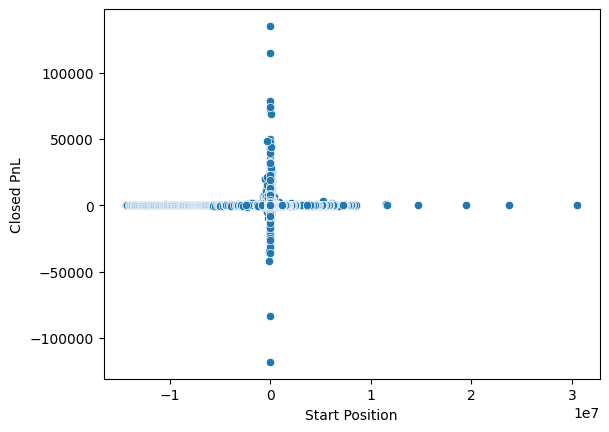

In [54]:
# Plotting Start Position vs Closed pnl
sns.scatterplot(x='Start Position',y='Closed PnL',data=df)
plt.show()

* Here can be seen that their is no correlation between startpoistion and closed pnl.

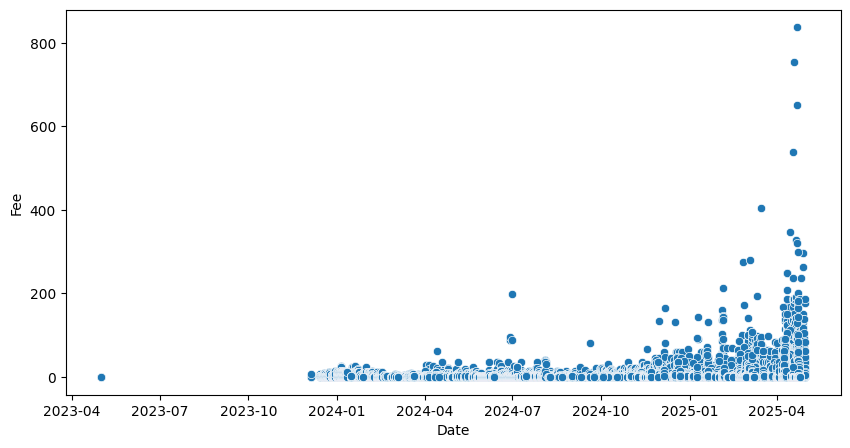

In [55]:
#Plotting Date vs Fee
plt.figure(figsize=(10,5))
sns.scatterplot(x='Date',y='Fee',data=df)
plt.show()

* It can be seen that fees are higher at 2025 as compare to 2024 so we can say that fees are raising after 2024.

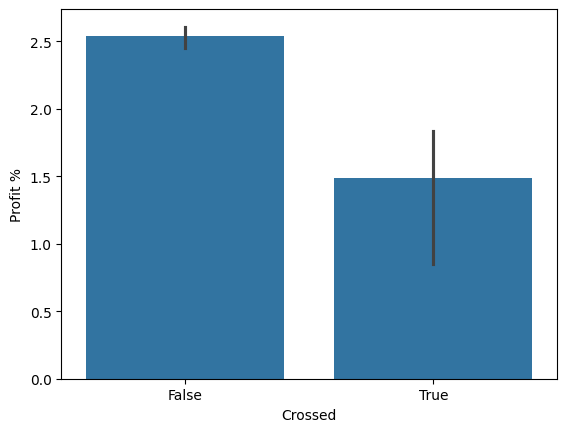

In [56]:
# Aggressive trading and non aggressive trading
sns.barplot(x='Crossed',y='Profit %',data=df)
plt.show()

* Here it can be seen that agressive trading is not causing profit in most of the cases so one should be Trade with his proper knowledge and experience.

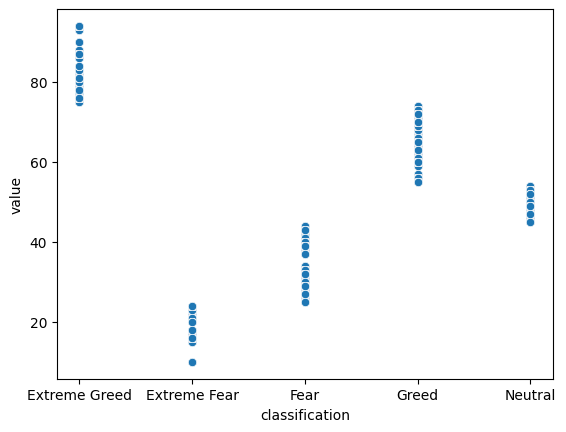

In [57]:
#higher value = more greed → traders may take more risk
#Lower value = more fear → traders may sell or hold back
sns.scatterplot(x='classification',y='value',data=df)
plt.show()

* From the data it can be said that the trader with extreme greed has shown higher value taking more risk

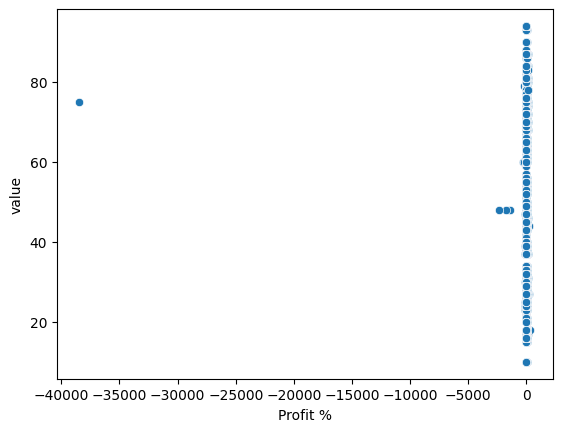

In [58]:
# plotting Profit % vs value
sns.scatterplot(x='Profit %',y='value',data=df)
plt.show()

* From this plot it can be said that higher value risk taker mostly make profits rather than loss.

In [59]:
# Value Vs Profit to know that taking risk is profitable or not.
high_value=df.groupby('value')['Profit %'].mean().sort_values(ascending=False)

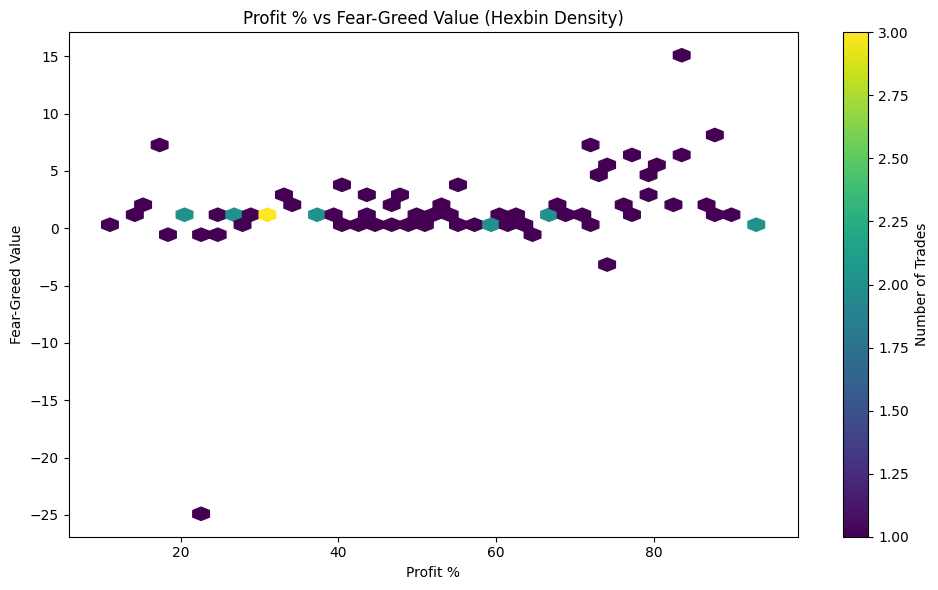

In [60]:
plt.figure(figsize=(10, 6))
plt.hexbin(high_value.index, high_value.values, gridsize=40, cmap='viridis', mincnt=1)
plt.colorbar(label='Number of Trades')
plt.xlabel('Profit %')
plt.ylabel('Fear-Greed Value')
plt.title('Profit % vs Fear-Greed Value (Hexbin Density)')
plt.tight_layout()
plt.show()


* In these plot it can be seen that higher profits are only for higher risk takers(value) even if the trades done are less.

In [61]:
Bitcoin=df[df['Coin']=="BTC"]

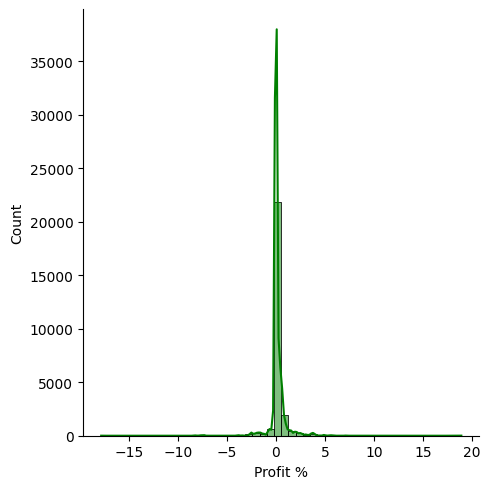

In [63]:
sns.displot(Bitcoin['Profit %'], bins=50, kde=True, color='green')

# Conclusions


* It has found that most of the Coin used in  trading business is Hype, @107, BTC, ETH, SOL and other Coded coins can be seen in the list, That may be they are doing well in market.

* It has been seen that coins @114,@31, @93, @39, @53, @103,@109, @47, @35, @116 are making more profits in the market.They might be not returning the highest but their Mean value is highest that is these coins overall performance is highest as per the no. of times they are used for trades.

* As per the data, Seller has made more profits than buyers which is obvious in market.Buying has also made profit but not that amount of profit as seller made by selling them at right time, higher selling tends to make more profit.

* Auto-Deleveraging mechanism is showing the most profit as compare to other startegic directions.The second most is selling intent.And from the data it can be seen that Liquidated Isolated Short intent is performing worst and is increasing loses so avoid that.

* The trader with extreem greed means taking risk for trading tends to have higher profits as compare to neutrals and fears.

* Here it can be seen that agressive trading is not causing profit in most of the cases so one should be Trade with his proper knowledge and experience.

* It is seen that bitcoin are not giving high profits like other coded coins so the returns in bitcoin  for the current stage and as per the data is not high its moderate.

* It can be said that higher **value** (risk taker) mostly make profits rather than loss, Higher profits are only for higher risk takers(value) even if the trades done are less.